In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from ast import literal_eval
import json

#df= pd.read_csv('GOLDEN_Tot_ZeroBias_UL2017_DataFrame_chargeInner_PXLayer_1_halfevent.csv')
#df= pd.read_csv('ZeroBias_2018D_DataFrame_1D_chargeInner_PXLayer_4.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_4.csv')
df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_1.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_size_PXLayer_3.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_size_PXLayer_1.csv')

df['histo']=df['histo'].apply(literal_eval)

df.set_index(['fromrun','fromlumi'], inplace=True, drop=False)
df.sort_index(inplace=True)
#print(df.columns)
#
#df['labels']=0
print(df.tail())
#print(df['entries']==0)

                  Unnamed: 0  fromrun  fromlumi                  hname  \
fromrun fromlumi                                                         
325175  25            157910   325175        25  chargeInner_PXLayer_1   
        26            157911   325175        26  chargeInner_PXLayer_1   
        27            157912   325175        27  chargeInner_PXLayer_1   
        28            155812   325175        28  chargeInner_PXLayer_1   
        29            155813   325175        29  chargeInner_PXLayer_1   

                  entries     Xmax  Xmin  Xbins  \
fromrun fromlumi                                  
325175  25              0  80000.0   0.0    100   
        26              0  80000.0   0.0    100   
        27              0  80000.0   0.0    100   
        28              0  80000.0   0.0    100   
        29              0  80000.0   0.0    100   

                                                              histo  
fromrun fromlumi                                     

(100,)


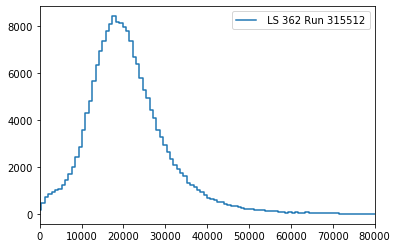

In [3]:
def PlotHist(df,run,ls):

    Xmax=80000.0 #30.0 #80000.0
    Xmin=0.0
    Xbins=100 #30 #100
    hname="size_PXLayer_1"
    
    #global df
    
    ahisto=df['histo'][run][ls]
    print(np.shape(ahisto))
    x= np.linspace(Xmin,Xmax,Xbins)
    plt.xlim(Xmin,Xmax)
    
    plt.step(x, ahisto, where='mid', label=(" LS " + str(df.fromlumi[run][ls]) + " Run " + str(df.fromrun[run][ls]) ))
    plt.legend()
    
#PlotHist(297050,15)
PlotHist(df,315512,362)
#PlotHist(df,306460,62)
#PlotHist(306459,1880)


In [4]:
import json

def checkLS(run,ls):
    isok=False
    global jsondata
    
    if str(run) in jsondata.keys():
        for i in jsondata[str(run)]:
           # print("i[0]",i[0])
           # print("i[1]",i[1])
            if (ls>=i[0] and ls <=i[1]):
                isok=True
                return isok
        return isok

#load the golden json file
jsondata={}
with open('Golden18.json') as json_file:
    jsondata = json.load(json_file)

df['labels']=False #initialize to false

for run in df['fromrun'].unique():
    for ls in df['fromlumi'][run]:
        df['labels'][run][ls]=checkLS(run,ls)
#print(df[df['labels']==True]) #to check against the Golden JSON

In [6]:
print(df.shape)
dfhighstat=df.loc[df['entries']>0]
print(dfhighstat.shape)
#PlotHist(dfhighstat,315512,362)

(250442, 10)
(239543, 10)


In [219]:
#split using np.array_split method. 
#chunk_size=1000
#data_std=np.array(dfhighstat['histo'][dfhighstat['labels']==True].values)
#datastdshape=np.int32(data_std.shape)
#splitnum=(datastdshape/chunk_size)
#split_data=np.array_split(data_std, 227)
#print(data_std.shape)
#print(split_data[0].shape)

# another way to split the data in panda dataframe form. The sdvantage is it will devide each dataset as the eesired chunk size (possible exception) the last array
# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller chunks

import math
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = math.ceil(len(df) / chunk_size) #len(df) // chunk_size + 1
    print(num_chunks)
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks, num_chunks
df_std=np.array(dfhighstat['histo'][dfhighstat['labels']==True].values)
#print(type(df_std))
df_std_split, numchunk = split_dataframe(df_std, chunk_size=500)
print(df_std_split[numchunk-1].shape)
print(type(numchunk))

lumi_std=np.array(dfhighstat['fromlumi'][dfhighstat['labels']==True].values)
lumi_std_split, num=split_dataframe(lumi_std, chunk_size=500)

run_std=np.array(dfhighstat['fromrun'][dfhighstat['labels']==True].values)
run_std_split, num=split_dataframe(run_std, chunk_size=500)
print(run_std_split[num-1])

455
(92,)
<class 'int'>
455
455
[325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172 325172 325172 325172 325172 325172 325172 325172 325172
 325172 325172]


In [220]:
import keras
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
H_all=[]
H_train_all=[]
i=0
data_std_train_list=[]
test_data_list=[]
while i<numchunk:
    data_std_train = np.stack(df_std_split[i], axis=0)
    data_std_train=np.delete(data_std_train, indexdl, axis=1)
    data_std_train=normalize(data_std_train, norm='l1', axis=1)
    data_std_train_list.append(data_std_train)
    model= NMF(n_components=7, verbose=False)
    H=model.fit_transform(data_std_train)
    W=model.components_
    H_train_all.append(H)
    i=i+1
    if(i<numchunk):
        test_data = np.stack(df_std_split[i], axis=0)
        test_data=np.delete(test_data, indexdl, axis=1)
        test_data=normalize(test_data, norm='l1', axis=1)
        test_data_list.append(test_data)
        H_test=model.transform(test_data)
        H_all.append(H_test)


In [221]:
print(np.shape(H_all))
print(np.shape(H_train_all))
print(np.shape(test_data_list))
print(np.shape(data_std_train_list))

(454,)
(455,)
(454,)
(455,)


In [222]:
import numpy as np
import scipy as stats
from scipy.spatial import distance
from sklearn.preprocessing import normalize

train_shape=str(np.shape(H_train_all))
test_shape=str(np.shape(H_all))
a=int((test_shape.split(',')[0].split('(')[1]))
b=int((train_shape.split(',')[0].split('(')[1]))

Eucl_dist=np.zeros(a)
Cityblk_dist=np.zeros(a)
correlation_dist=np.zeros(a)
minkowski_dist=np.zeros(a)

H_train_cut=H
for i in range(0,a):
    H_test_cut=H_all[i]  # run from 
    H_train_cut=H_train_all[i]
    if(i==a-1):
        continue
        #print("cut for last array", H_train_cut.shape)
        #print("inside loop", i,H_train_cut.shape ) 
        lastshape=str(np.shape(H_all[i]))
        print(lastshape)
        al=int((lastshape.split(',')[0].split('(')[1]))
        print(al)
        bl=np.int32(al)
        #H_train_cut=H_train_all[:27092,:]
        print("train inside if",H_train_cut.shape)
    #print("test",H_test_cut.shape)
    #print("train",H_train_cut.shape)
    #H_train_cut_norm = normalize(H_train_cut, axis=1, norm='l1')
    #H_test_cut_norm = normalize(H_test_cut, axis=1, norm='l1')
    H_test_vec=np.asarray(H_test_cut).reshape(-1)
    H_train_vec=np.asarray(H_train_cut).reshape(-1)
    #print(np.sum(H_train_cut_norm[0]))
    #print(H_vec)
    #print(H_train_vec)

    shape=str(np.shape(df_std_split[i]))
    norm=int((shape.split(',')[0].split('(')[1]))
    #H_train_vec_norm= normalize(H_train_vec[:,np.newaxis], axis=0).ravel()
    #H_test_vec_norm= normalize(H_test_vec[:,np.newaxis], axis=0).ravel()
    #print(np.sum(H_train_vec_norm))
    Eucl_dist[i]=distance.euclidean(H_train_vec, H_test_vec)/norm
    print(Eucl_dist[i], i)
    #Cityblk_dist[i]=distance.cityblock(H_train_vec, H_test_vec)/norm
    #correlation_dist[i]=distance.correlation(H_train_vec, H_test_vec)/norm
    #minkowski_dist[i]=distance.minkowski(H_train_vec, H_test_vec)
print( Eucl_dist.shape)
#print(Cityblk_dist.shape)
#print(minkowski_dist.shape)

0.0013653311485762032 0
0.00244259569212794 1
0.0019098089849844937 2
0.0017881752986236268 3
0.0024268630316657477 4
0.001505270201381398 5
0.00210707342643011 6
0.0017567534968754588 7
0.003503055883849118 8
0.002292991754308568 9
0.0020751561123362673 10
0.002747086017658157 11
0.0009588108979040888 12
0.005845417780567166 13
0.001957815345344744 14
0.0020753389330436995 15
0.0051268035734104 16
0.0027281933937190177 17
0.0018671620316309137 18
0.0036448745715575567 19
0.002579495289540267 20
0.008730539051396792 21
0.0024843101623285885 22
0.0009516212726032356 23
0.0013448941011360985 24
0.0020839475515357043 25
0.0034806150708647406 26
0.000901146727695016 27
0.0014175038754309281 28
0.0016577532931140316 29
0.0008453893412068168 30
0.0026130915166580424 31
0.004554778180244324 32
0.002466122266384389 33
0.003657489654798138 34
0.003871264638566097 35
0.015515964385577414 36
0.0012391360121497914 37
0.0019150397162962544 38
0.0017597430867468376 39
0.0024236181264028567 40
0.0020

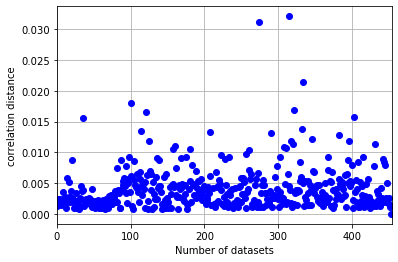

In [223]:

plt.xlim(0,a)
#plt.ylim(0,1.8)
plt.grid()
plt.xlabel("Number of datasets")
plt.ylabel("correlation distance")
x_list= np.arange(0, a, 1)
plt.plot(x_list,Eucl_dist,"bo")
#plt.plot(x_list,Cityblk_dist,"bo")
#xnojson_list= np.arange(0, numchunk_nojson, 1)
#plt.plot(xnojson_list,Eucl_dist_nojson,"ro")  
#plt.plot(x_list,Cityblk_dist,"bo")

546
321917


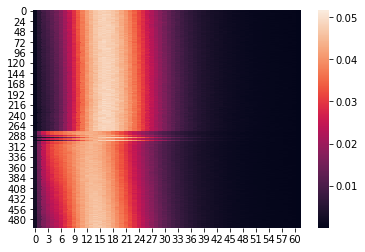

In [254]:
import seaborn as sns
import matplotlib.pylab as plt
#data_plot=np.delete(data_plot,index0,0)
#data_plot=normalize(data_plot, norm='l1', axis=1)
sns.heatmap(data_std_train_list[315])#, vmin=0, vmax=0.05)
print(lumi_std_split[315][10])
print(run_std_split[315][10])

(100,)


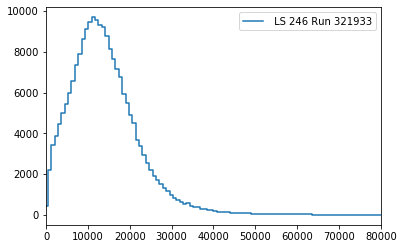

In [252]:
PlotHist(df,321933,246)

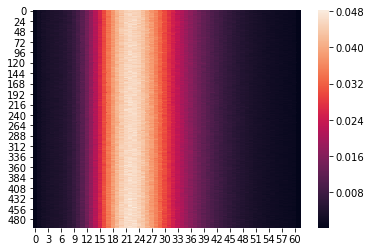

In [228]:
import seaborn as sns

#data_plot=np.delete(data_plot,index0,0)
#data_plot=normalize(data_plot, norm='l1', axis=1)
sns.heatmap(test_data_list[12])#, vmin=0, vmax=0.05)

In [123]:
H_all=[]
for i in range(0,numchunk):
    test_data = np.stack(df_std_split[i], axis=0)
    test_data=np.delete(test_data, indexdl, axis=1)
    test_data=normalize(test_data, norm='l1', axis=1)
    H_test=model.transform(test_data)
    H_all.append(H_test)
    #print(H_test.shape, i)
#print(H_all[numchunk-1].shape)

In [124]:
import numpy as np
import scipy as stats
from scipy.spatial import distance
from sklearn.preprocessing import normalize

numchunk=numchunk-1
Eucl_dist=np.zeros(numchunk)
Cityblk_dist=np.zeros(numchunk)
correlation_dist=np.zeros(numchunk)
minkowski_dist=np.zeros(numchunk) 
H_train_cut=H
for i in range(1,numchunk):
    if(i==numchunk):
        continue
        lastshape=str(np.shape(df_std_split[i]))
        a=int((lastshape.split(',')[0].split('(')[1]))
        H_train_cut=H[:a,:]
        print("cut for last array", H_train_cut.shape)
    #print("inside loop", i,H_train_cut.shape )    
    H_test_cut=H_all[i-1]  # run from 
    #H_train_cut_norm = normalize(H_train_cut, axis=1, norm='l1')
    #H_test_cut_norm = normalize(H_test_cut, axis=1, norm='l1')
    H_test_vec=np.asarray(H_test_cut).reshape(-1)
    H_train_vec=np.asarray(H_train_cut).reshape(-1)
    #print(np.sum(H_train_cut_norm[0]))
    #print(H_vec)
    #print(H_train_vec)

    shape=str(np.shape(df_std_split[i]))
    norm=int((shape.split(',')[0].split('(')[1]))
    #H_train_vec_norm= normalize(H_train_vec[:,np.newaxis], axis=0).ravel()
    #H_test_vec_norm= normalize(H_test_vec[:,np.newaxis], axis=0).ravel()
    #print(np.sum(H_train_vec_norm))
    Eucl_dist[i]=distance.euclidean(H_train_vec, H_test_vec)/norm
    Cityblk_dist[i]=distance.cityblock(H_train_vec, H_test_vec)/norm
    correlation_dist[i]=distance.correlation(H_train_vec, H_test_vec)/norm
    minkowski_dist[i]=distance.minkowski(H_train_vec, H_test_vec)
print( correlation_dist.shape) 
#print(Cityblk_dist.shape)
#print(minkowski_dist.shape)


(45,)


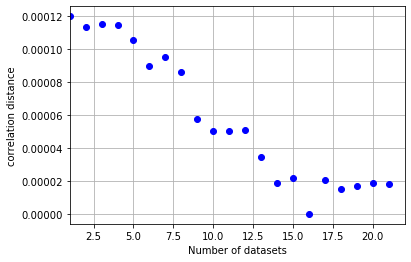

In [92]:

plt.xlim(1,numchunk)
plt.ylim(0,1.8)
plt.grid()
plt.xlabel("Number of datasets")
plt.ylabel("correlation distance")
x_list= np.arange(0, numchunk, 1)
plt.plot(x_list,correlation_dist,"bo")
#plt.plot(x_list,Cityblk_dist,"bo")
#xnojson_list= np.arange(0, numchunk_nojson, 1)
#plt.plot(xnojson_list,Eucl_dist_nojson,"ro")  
#plt.plot(x_list,Cityblk_dist,"bo")

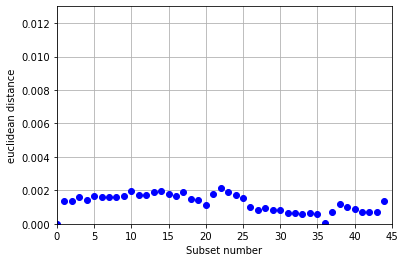

In [125]:
plt.xlim(0,numchunk)
plt.ylim(0,0.013)
plt.grid()
plt.xlabel("Subset number")
plt.ylabel("euclidean distance")
x_list= np.arange(0, numchunk, 1)
plt.plot(x_list,Eucl_dist,"bo")  

In [159]:
df_nojson=np.array(dfhighstat['histo'][dfhighstat['labels']==False].values)
df_nojson_split, numchunk_nojson = split_dataframe(df_nojson, chunk_size=3000)
print(df_nojson_split[numchunk_nojson-1].shape)

5
(451,)


In [151]:
Hnojson_all=[]
for i in range(0,numchunk_nojson):
    test_nojsondata_data = np.stack(df_nojson_split[i], axis=0)
    test_nojsondata_data=np.delete(test_nojsondata_data, indexdl, axis=1)
    test_nojsondata_data=normalize(test_nojsondata_data, norm='l1', axis=1)
    H_nojson_test=model.transform(test_nojsondata_data)
    Hnojson_all.append(H_nojson_test)
    print(H_nojson_test.shape)
print(Hnojson_all[0].shape)

violation: 1.0
violation: 0.07779650052569899
violation: 0.01923664476514129
violation: 0.014717073115438595
violation: 0.01225578549589732
violation: 0.010376995032423196
violation: 0.008827112070089484
violation: 0.0075255950616450575
violation: 0.006425606102614003
violation: 0.005491581452726558
violation: 0.004696711885939735
violation: 0.004019806718043467
violation: 0.0034426904551013372
violation: 0.0029501763557368394
violation: 0.002529940188389485
violation: 0.002171613390020727
violation: 0.001865614080983562
violation: 0.0016041834604619578
violation: 0.0013807519474903546
violation: 0.0011896805421864065
violation: 0.0010262770593603497
violation: 0.0008865182624834132
violation: 0.0007669334083624886
violation: 0.0006645780905668336
violation: 0.0005769530807628069
violation: 0.0005018798061019627
violation: 0.0004375323730608484
violation: 0.00038236090219791186
violation: 0.0003350254827179787
violation: 0.00029438639988978946
violation: 0.0002594736431370462
violation

In [141]:
Eucl_dist_nojson=np.zeros(numchunk_nojson)
Cityblk_dist_nojson=np.zeros(numchunk_nojson)
H_train_cut1=H
print(numchunk_nojson)
for i in range(0,numchunk_nojson):
    print(i)
   
    if(i==numchunk_nojson-1):
        lastshape=str(np.shape(df_nojson_split[i]))
        a=int((lastshape.split(',')[0].split('(')[1]))
        H_train_cut1=H[:a,:]
        print("a",a)
    #print("shape",Hnojson_all[i].shape)   
    H_test_nojson_cut=Hnojson_all[i]
    
    H_nojson_vec=np.asarray(H_test_nojson_cut).reshape(-1)
    H_train_vec1=np.asarray(H_train_cut1).reshape(-1)
    #print(H_vec)
    #print(H_train_vec)

    Eucl_dist_nojson[i]=distance.euclidean(H_train_vec1, H_nojson_vec)
    Cityblk_dist_nojson[i]=distance.cityblock(H_train_vec1, H_nojson_vec)
print( Eucl_dist_nojson) 
print(Cityblk_dist_nojson)

13
0
1
2
3
4
5
6
7
8
9
10
11
12
a 451
[ 1.96593036  5.50520251  1.59573731  4.28947559  4.2975234   7.20514106
 14.71582346 12.15396438  9.03436233  9.53759775  9.92218041 11.42563895
  7.32320227]
[ 88.37681446 278.39022869  74.58898699 169.26041897 201.8258434
 316.86153387 669.63539978 588.6570693  480.64508112 512.30752903
 524.40423952 585.42839983 261.76310441]


[[ 89 426 631 ...  83  70  20]
 [105 384 663 ...  95  99  22]
 [ 96 408 682 ... 103  92  25]
 ...
 [128 611 933 ...  97 113  28]
 [133 573 956 ... 124 111  31]
 [143 573 907 ... 107 101  23]]


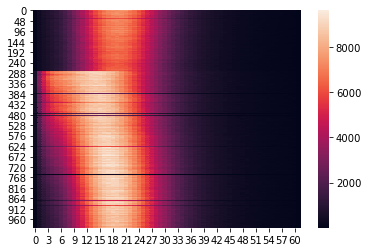

In [136]:
import seaborn as sns

data_plot = np.stack(df_std_split[0], axis=0)
data_plot=np.delete(data_plot, indexdl, axis=1)
index0=[]
for i in range(400,1000):
    index0.append(i)
#print(index0)
print(data_plot)
#data_plot=np.delete(data_plot,index0,0)
#data_plot=normalize(data_plot, norm='l1', axis=1)
sns.heatmap(data_plot)#, vmin=0, vmax=0.05)

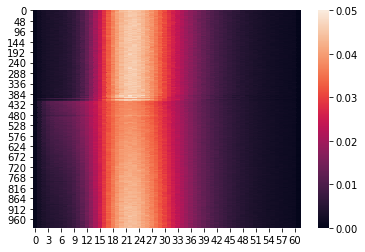

In [263]:
data_plot = np.stack(df_std_split[1], axis=0)
data_plot=np.delete(data_plot, indexdl, axis=1)
data_plot=normalize(data_plot, norm='l1', axis=1)

sns.heatmap(data_plot, vmin=0, vmax=0.05)

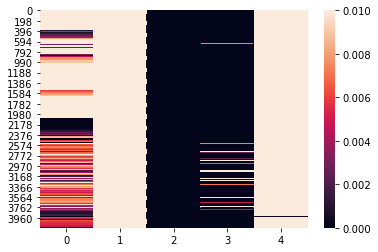

In [190]:
sns.heatmap(Hnojson_all[2],vmin=0, vmax=0.01)

In [9]:
data_nojson=np.array(dfhighstat['histo'][dfhighstat['labels']==False].values)
data_nojson = np.stack(data_nojson, axis=0)
shortrange=True
if(shortrange):
        #indexdl=np.array([0,1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
        #indexdl=np.array([0,19,20,21,22,23,24,25,26,27,28,29,30])
        #indexdl=np.array([71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        #indexdl=np.array([0,1,2,3,4,5,6,7,8,9,10,11,36,37,38,39,40,41,42,43,44,45,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        data_nojson=np.delete(data_nojson, indexdl, axis=1)
data_nojson=normalize(data_nojson, norm='l1', axis=1)
H_nojson=model.transform(data_nojson)
#W_nojson,H_nojson=NMF_model(data_nojson,6)
#print(W_nojson[0].sum())
#print(W_nojson.shape)
print(len(H_nojson))
print(H_nojson.shape)
print(data_nojson.shape)

violation: 1.0
violation: 0.07808812360562069
violation: 0.02385163411905544
violation: 0.012655818582826594
violation: 0.009532598023753785
violation: 0.00785611060991623
violation: 0.006573306943429197
violation: 0.0055141006068399855
violation: 0.0046338791622328405
violation: 0.003909993894464262
violation: 0.0033152465604997963
violation: 0.002830335188170585
violation: 0.0024279518487693337
violation: 0.0020987606464671314
violation: 0.0018254714699760023
violation: 0.0015984029038038636
violation: 0.0014109602868730938
violation: 0.0012545018650255634
violation: 0.0011238451227069647
violation: 0.001014503608254479
violation: 0.0009228079280043218
violation: 0.0008457613292218438
violation: 0.0007809899270620539
violation: 0.0007258786233807351
violation: 0.0006795783330049047
violation: 0.0006398635539595978
violation: 0.0006044999334315215
violation: 0.0005733023505919467
violation: 0.0005478306381384375
violation: 0.0005258810884228596
violation: 0.0005067002427709388
violati

(158964, 5)
(12451, 62)
(12451,)


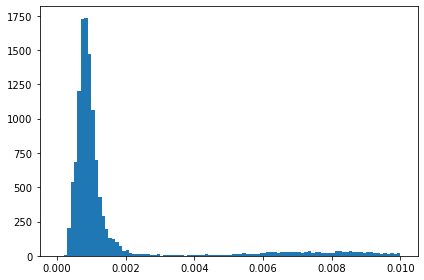

In [10]:
H_nojson_cut=H_nojson[:,:4]
W_cut=W[:4,:]    
print(H_cut.shape)
MSE_dist(data_nojson,W,H_nojson,"nojson")

In [10]:
df_test1= pd.read_csv('GOLDEN_Tot_ZeroBias_UL2017_DataFrame_chargeInner_PXLayer_1.csv')
#df_test1=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_4.csv')
df_test1['histo']=df_test1['histo'].apply(literal_eval)

df_test1.set_index(['fromrun','fromlumi'], inplace=True, drop=False)
df_test1.sort_index(inplace=True)
#print(df.columns)
#
#df_test1['labels']=0
print(df_test1.shape)

(202289, 6)


In [50]:
dfhighstat_test1=df_test1.loc[df_test1['entries']>0]
#dfhighstat_test1 = dfhighstat_test1.sample(frac = 1)

In [51]:
data_test1=np.array(dfhighstat_test1['histo'])
data_test1 = np.stack(data_test1, axis=0)
indexdl=np.array([71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
#indexdl=np.array([0,1,2,3,4,5,6,7,8,9,10,11,36,37,38,39,40,41,42,43,44,45,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
data_test1=np.delete(data_test1, indexdl, axis=1)
#data_test=data_test[:202280,:]
print(data_test1.shape)
data_test1=normalize(data_test1, norm='l1', axis=1)
H_test1=model.transform(data_test1)

(202289, 72)
violation: 1.0
violation: 0.2120958894399278
violation: 0.09572422770618882
violation: 0.05114956000731512
violation: 0.03010716890278329
violation: 0.018687978582101198
violation: 0.012100001737345668
violation: 0.008171025556174896
violation: 0.005723943321331328
violation: 0.0041643087382447815
violation: 0.0031561096675575308
violation: 0.0024934841784060766
violation: 0.0020487705961171453
violation: 0.001741126638810187
violation: 0.0015196912457493194
violation: 0.0013530319917042192
violation: 0.0012220336423332627
violation: 0.0011150897545815078
violation: 0.001024749868044625
violation: 0.0009463930961821547
violation: 0.0008769098497574196
violation: 0.000814147884404131
violation: 0.0007566625990217933
violation: 0.0007035485964740361
violation: 0.0006543597608846467
violation: 0.0006086160572772353
violation: 0.0005661413721450208
violation: 0.0005266440041616355
violation: 0.0004901321197064094
violation: 0.0004562993363805074
violation: 0.000425023054961131

(202289, 72)
(202289,)


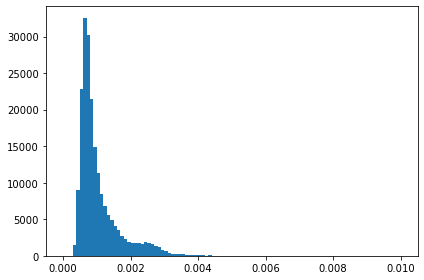

In [52]:
MSE_dist(data_test1,W,H_test1,"test1")

In [12]:
import numpy as np
import scipy as stats
from scipy.spatial import distance
H_cut=H[:12451,:]     #47500
H_valid_cut=H_valid[:12451,:]
H_nojson_cut=H_nojson[:12451,:]
#H_test1_cut=H_test1[:12451,:]
#H_test1_cut=H_test1[:10000,:]
#print("before 1D ",H_train_cut)
H_valid_vec=np.asarray(H_valid_cut).reshape(-1)
H_train_vec=np.asarray(H_cut).reshape(-1)
H_nojson_vec=np.asarray(H_nojson).reshape(-1)
#H_test1_vec=np.asarray(H_test1_cut).reshape(-1)
#H_test1_vec=np.asarray(H_test1_cut).reshape(-1)
print("chebyshev")
print(distance.chebyshev(H_train_vec, H_valid_vec))
print(distance.chebyshev(H_train_vec, H_nojson_vec))
#print(distance.chebyshev(H_train_vec, H_test1_vec))
print("cityblock")
print(distance.cityblock(H_train_vec, H_valid_vec))
print(distance.cityblock(H_train_vec, H_nojson_vec))
#print(distance.cityblock(H_train_vec, H_test1_vec))
print("euclidean")
print(distance.euclidean(H_train_vec, H_valid_vec))
print(distance.euclidean(H_train_vec, H_nojson_vec))
#print(distance.euclidean(H_train_vec, H_test1_vec))
print("correlation")
print(distance.correlation(H_train_vec, H_valid_vec))
print(distance.correlation(H_train_vec, H_nojson_vec))
#print(distance.correlation(H_train_vec, H_test1_vec))
print("directed_hausdorff")
print(distance.directed_hausdorff(H_cut, H_valid_cut)[0])
print(distance.directed_hausdorff(H_cut, H_nojson)[0])
#print(distance.directed_hausdorff(H_cut, H_test1_cut)[0])

#print(np.mean(distance.cdist(H, H_valid, 'euclidean')))
#print(np.mean(distance.cdist(H, H_nojson, 'mahalanobis')))

chebyshev
0.34437690985422365
0.4060506053497094
cityblock
437.69772833272134
470.89192728527553
euclidean
2.2025085604130656
3.0974888726650374
correlation
0.6015954659316107
0.750608593830976
directed_hausdorff
0.3095778019625346
0.030929901329949792


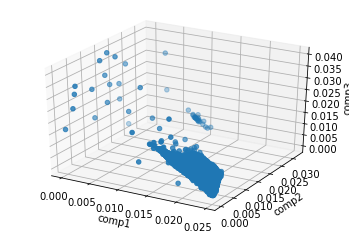

In [13]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H[:,0],H[:,1],H[:,2])
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()

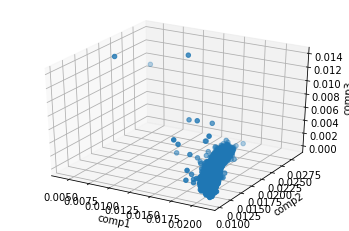

In [14]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_valid[:,0],H_valid[:,1],H_valid[:,2])
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()

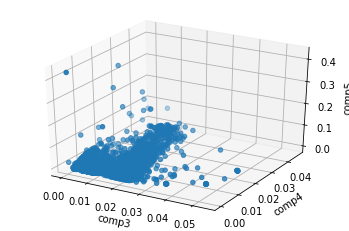

In [15]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_nojson[:,1],H_nojson[:,2],H_nojson[:,3])
#ax.scatter(H_nojson[:,1],H_nojson[:,2])
ax.set_xlabel('comp3')
ax.set_ylabel('comp4')
ax.set_zlabel('comp5')
plt.show()

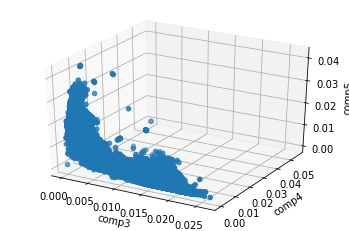

In [54]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_test1[:,1],H_test1[:,2],H_test1[:,3])
#ax.scatter(H_nojson[:,1],H_nojson[:,2])
ax.set_xlabel('comp3')
ax.set_ylabel('comp4')
ax.set_zlabel('comp5')
plt.show()

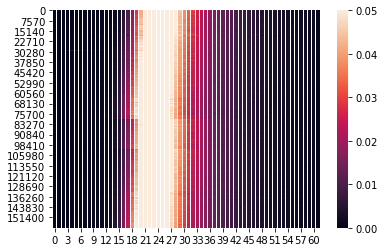

In [16]:
import seaborn as sns
sns.heatmap(data_std_train, vmin=0, vmax=0.05)
#sns.heatmap(data_std_train)

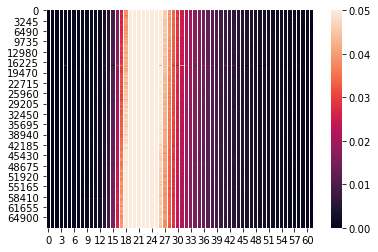

In [17]:
sns.heatmap(data_std_valid, vmin=0, vmax=0.05)

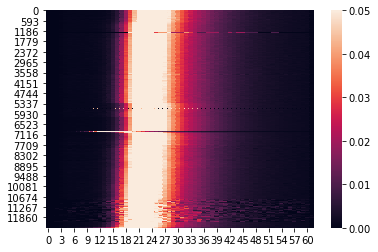

In [18]:
sns.heatmap(data_nojson, vmin=0, vmax=0.05)

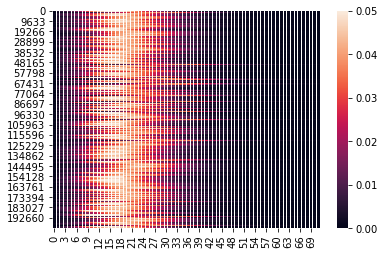

In [55]:
sns.heatmap(data_test1, vmin=0, vmax=0.05)

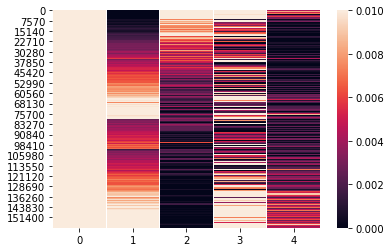

In [20]:
import seaborn as sns
#sns.heatmap(H,annot=True, fmt="f")
sns.heatmap(H,vmin=0, vmax=0.01)

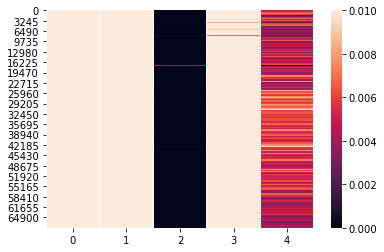

In [24]:
sns.heatmap(H_valid,vmin=0, vmax=0.01)

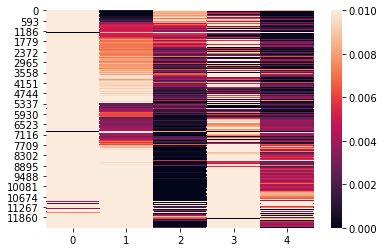

In [22]:
sns.heatmap(H_nojson,vmin=0, vmax=0.01)

In [23]:
sns.heatmap(H_test1,vmin=0, vmax=0.01)

NameError: name 'H_test1' is not defined

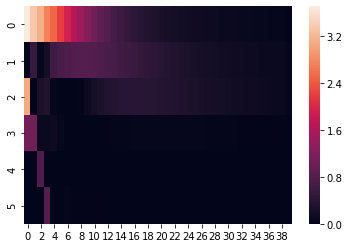

In [220]:
sns.heatmap(W)

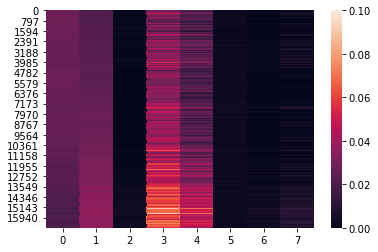

In [76]:
sns.heatmap(H_valid,vmin=0, vmax=0.1)

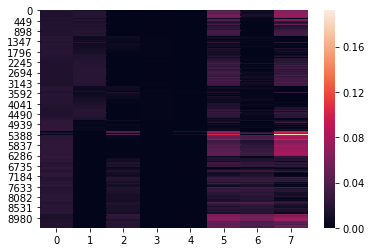

In [77]:
sns.heatmap(H_nojson)

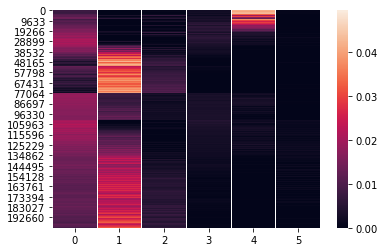

In [66]:
sns.heatmap(H_test)

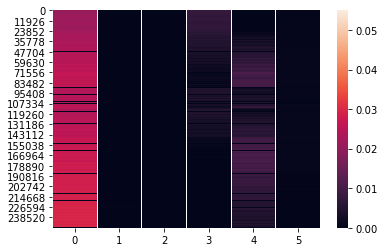

In [67]:
sns.heatmap(H_test1)